# Data visualization for the different parks separately

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, acf, pacf, plot_pacf

import sys
import os

from satprod.data_handlers.num_data import NumericalDataHandler

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

#from matplotlib import cycler
#colors = cycler('color',
#                ['#00C700', '#1F3DFF', '#4FFF57', '#000066',
#                 '#F2D42E', '#FF5924', '#C4000D', '#FFA6BD',
#                 '#FF2459', '#540AFF'])

plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
#plt.rc('grid', color='w', linestyle='solid')
#plt.rc('xtick', direction='out', color='gray')
#plt.rc('ytick', direction='out', color='gray')
#plt.rc('patch', edgecolor='#E6E6E6')
#plt.rc('lines', linewidth=2)

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
pd.set_option("display.max_rows", 700, "display.max_columns", 50)

In [3]:
num = NumericalDataHandler()

data = num.read_formatted_data(nan=True)

split = datetime(2020, 5, 12, 0)
data = data[data.index < split]

In [4]:
dev_mode = False # to not have to scroll over all the plots when coding

## Functions

In [5]:
def wind_speed_plots(park: str):
    #acf_wind = acf(enc_df[f'wind_speed_{park}'].dropna(axis=0).values, nlags=24*14, fft=False)
    
    fig = plot_acf(data[f'wind_speed_{park}'].dropna(axis=0).values, lags=24*400)
    fig.set_size_inches(16,4)
    plt.axvline(x=8760, label='1 year (8760 hours)', color='r')
    plt.ylabel(r'$\rho$')
    plt.xlabel('lag (hours)')
    plt.title(r'Autocorrelation $\rho$ of the time series given by $v$')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'autocorr_wind_speed_long_{park}.png')
    plt.show()
    
    fig = plot_acf(data[f'wind_speed_{park}'].dropna(axis=0).values, lags=24*30)
    fig.set_size_inches(16,4)
    plt.ylabel(r'$\rho$')
    plt.xlabel('lag (hours)')
    plt.title(r'Autocorrelation $\rho$ of the time series given by $v$')
    plt.tight_layout()
    plt.savefig(f'autocorr_wind_speed_mid_{park}.png')
    plt.show()
    
    fig = plot_acf(data[f'wind_speed_{park}'].dropna(axis=0).values, lags=24*4)
    fig.set_size_inches(16,4)
    plt.ylabel(r'$\rho$')
    plt.xlabel('lag (hours)')
    plt.title(r'Partial autocorrelation $\phi$ of the time series given by $v$')
    plt.tight_layout()
    plt.savefig(f'autocorr_wind_speed_short_{park}.png')
    plt.show()
    
    fig = plot_pacf(data[f'wind_speed_{park}'].dropna(axis=0), lags=24*7)
    fig.set_size_inches(16,4)
    plt.ylabel(r'$\phi$')
    plt.xlabel('lag (hours)')
    plt.title(r'Partial autocorrelation $\phi$ of the time series given by $v$')
    plt.tight_layout()
    plt.savefig(f'partial_autocorr_wind_speed_{park}.png')
    plt.show()
    
def wind_direction_plots(park: str):
    fig = plot_acf(data[f'wind_direction_{park}_sin'].dropna(axis=0).values, lags=24*10)
    fig.set_size_inches(16,4)
    plt.title(r'Autocorrelation $\rho$ of the time series given by $\sin{\theta}$')
    plt.ylabel(r'$\rho$')
    plt.xlabel('lag (hours)')
    plt.tight_layout()
    plt.savefig(f'autocorr_wind_dirsin_{park}.png')
    plt.show()
    
    fig = plot_acf(data[f'wind_direction_{park}_cos'].dropna(axis=0).values, lags=24*10)
    fig.set_size_inches(16,4)
    plt.title(r'Autocorrelation $\rho$ of the time series given by $\cos{\theta}$')
    plt.ylabel(r'$\rho$')
    plt.xlabel('lag (hours)')
    plt.tight_layout()
    plt.savefig(f'autocorr_wind_dircos_{park}.png')
    plt.show()

    fig = plot_pacf(data[f'wind_direction_{park}_sin'].dropna(axis=0).values, lags=24*10)
    fig.set_size_inches(16,4)
    plt.title(r'Partial autocorrelation $\phi$ of the time series given by $\sin{\theta}$')
    plt.ylabel(r'$\phi$')
    plt.xlabel('lag (hours)')
    plt.tight_layout()
    plt.savefig(f'partial_autocorr_wind_dirsin_{park}.png')
    plt.show()
    
    fig = plot_pacf(data[f'wind_direction_{park}_cos'].dropna(axis=0).values, lags=24*10)
    fig.set_size_inches(16,4)
    plt.title(r'Partial autocorrelation $\phi$ of the time series given by $\cos{\theta}$')
    plt.ylabel(r'$\phi$')
    plt.xlabel('lag (hours)')
    plt.tight_layout()
    plt.savefig(f'partial_autocorr_wind_dircos_{park}.png')
    plt.show()
    
def production_plots(park: str):
    fig = plot_acf(data[f'production_{park}'].dropna(axis=0).values, lags=24*400)
    fig.set_size_inches(16,4)
    plt.xlabel('hours')
    plt.tight_layout()
    plt.show()
    
    fig = plot_acf(data[f'production_{park}'].dropna(axis=0).values, lags=24*30)
    fig.set_size_inches(16,4)
    plt.xlabel('hours')
    plt.tight_layout()
    plt.show()

    fig = plot_acf(data[f'production_{park}'].dropna(axis=0).values, lags=24*4)
    fig.set_size_inches(16,4)
    plt.xlabel('hours')
    plt.tight_layout()
    plt.show()

    fig = plot_pacf(data[f'production_{park}'].dropna(axis=0), lags=24*7)
    fig.set_size_inches(16,4)
    plt.xlabel('hours')
    plt.tight_layout()
    plt.show()


In [6]:
data.shift(1)

,wind_speed_bess,wind_speed_vals,wind_speed_yvik,wind_direction_bess_cos,wind_direction_bess_sin,wind_direction_vals_cos,wind_direction_vals_sin,wind_direction_yvik_cos,wind_direction_yvik_sin,wind_speed_bess+1h,wind_speed_bess+2h,wind_speed_bess+3h,wind_speed_bess+4h,wind_speed_bess+5h,wind_speed_vals+1h,wind_speed_vals+2h,wind_speed_vals+3h,wind_speed_vals+4h,wind_speed_vals+5h,wind_speed_yvik+1h,wind_speed_yvik+2h,wind_speed_yvik+3h,wind_speed_yvik+4h,wind_speed_yvik+5h,wind_direction_bess_cos+1h,...,wind_direction_yvik_cos+2h,wind_direction_yvik_cos+3h,wind_direction_yvik_cos+4h,wind_direction_yvik_cos+5h,wind_direction_yvik_sin+1h,wind_direction_yvik_sin+2h,wind_direction_yvik_sin+3h,wind_direction_yvik_sin+4h,wind_direction_yvik_sin+5h,production_bess,production_skom,production_vals,production_yvik,temporal_cos,temporal_sin,temporal_cos+1h,temporal_cos+2h,temporal_cos+3h,temporal_cos+4h,temporal_cos+5h,temporal_sin+1h,temporal_sin+2h,temporal_sin+3h,temporal_sin+4h,temporal_sin+5h
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 01:00:00,10.3,11.8,11.8,-0.600420,0.799685,-0.594823,0.803857,-0.579281,0.815128,10.2,10.2,9.7,8.9,9.1,11.9,12.3,11.9,11.0,11.2,11.4,11.3,10.9,9.8,9.6,-0.577858,...,-0.534352,-0.518027,-0.460200,-0.427358,0.834848,0.845262,0.855364,0.887815,0.904083,NaN,NaN,NaN,NaN,0.999853,0.017166,0.999853,0.999853,0.999853,0.999853,0.999853,0.017166,0.017166,0.017166,0.017166,0.017166
2006-01-01 02:00:00,10.2,11.9,11.4,-0.577858,0.816138,-0.559193,0.829038,-0.550481,0.834848,10.2,9.7,8.9,9.1,9.0,12.3,11.9,11.0,11.2,10.8,11.3,10.9,9.8,9.6,9.5,-0.573576,...,-0.518027,-0.460200,-0.427358,-0.417867,0.845262,0.855364,0.887815,0.904083,0.908508,NaN,NaN,NaN,NaN,0.999853,0.017166,0.999853,0.999853,0.999853,0.999853,0.999853,0.017166,0.017166,0.017166,0.017166,0.017166
2006-01-01 03:00:00,10.2,12.3,11.3,-0.573576,0.819152,-0.560639,0.828060,-0.534352,0.845262,9.7,8.9,9.1,9.0,8.4,11.9,11.0,11.2,10.8,9.8,10.9,9.8,9.6,9.5,8.9,-0.560639,...,-0.460200,-0.427358,-0.417867,-0.371368,0.855364,0.887815,0.904083,0.908508,0.928486,NaN,NaN,NaN,NaN,0.999853,0.017166,0.999853,0.999853,0.999853,0.999853,0.999853,0.017166,0.017166,0.017166,0.017166,0.017166
2006-01-01 04:00:00,9.7,11.9,10.9,-0.560639,0.828060,-0.582123,0.813101,-0.518027,0.855364,8.9,9.1,9.0,8.4,7.8,11.0,11.2,10.8,9.8,8.9,9.8,9.6,9.5,8.9,8.3,-0.512043,...,-0.427358,-0.417867,-0.371368,-0.310676,0.887815,0.904083,0.908508,0.928486,0.950516,NaN,NaN,NaN,NaN,0.999853,0.017166,0.999853,0.999853,0.999853,0.999853,0.999853,0.017166,0.017166,0.017166,0.017166,0.017166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-11 19:00:00,6.5,8.5,8.0,0.290702,-0.956814,0.248690,-0.968583,0.592013,-0.805928,5.2,4.4,3.5,3.5,3.0,8.0,6.8,6.3,5.0,4.1,7.6,6.0,5.6,5.6,6.8,0.495459,...,0.788011,0.858960,0.973179,0.998890,-0.669131,-0.615661,-0.512043,-0.230050,0.047106,14.132575,4.454405,4.720,4.361,-0.640593,0.767880,-0.640593,-0.640593,-0.640593,-0.640593,-0.640593,0.767880,0.767880,0.767880,0.767880,0.767880
2020-05-11 20:00:00,5.2,8.0,7.6,0.495459,-0.868632,0.350207,-0.936672,0.743145,-0.669131,4.4,3.5,3.5,3.0,1.9,6.8,6.3,5.0,4.1,2.9,6.0,5.6,5.6,6.8,5.5,0.557745,...,0.858960,0.973179,0.998890,0.972370,-0.615661,-0.512043,-0.230050,0.047106,0.233445,5.529549,1.666644,2.941,2.531,-0.640593,0.767880,-0.640593,-0.640593,-0.640593,-0.640593,-0.653680,0.767880,0.767880,0.767880,0.767880,0.756771
2020-05-11 21:00:00,4.4,6.8,6.0,0.557745,-0.830012,0.385906,-0.922538,0.788011,-0.615661,3.5,3.5,3.0,1.9,1.4,6.3,5.0,4.1,2.9,4.1,5.6,5.6,6.8,5.5,4.7,0.625243,...,0.973179,0.998890,0.972370,0.984196,-0.51

## Bessaker

### Wind speed

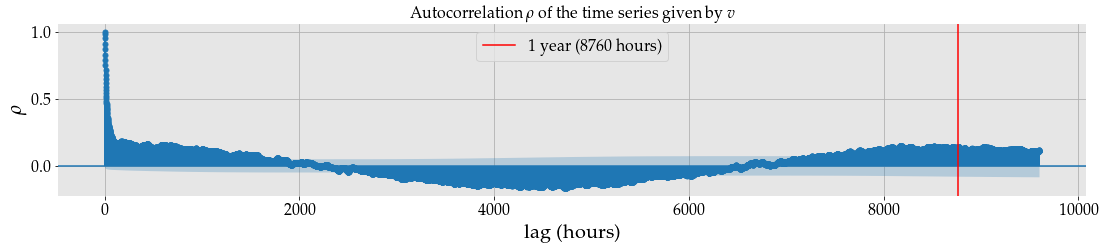

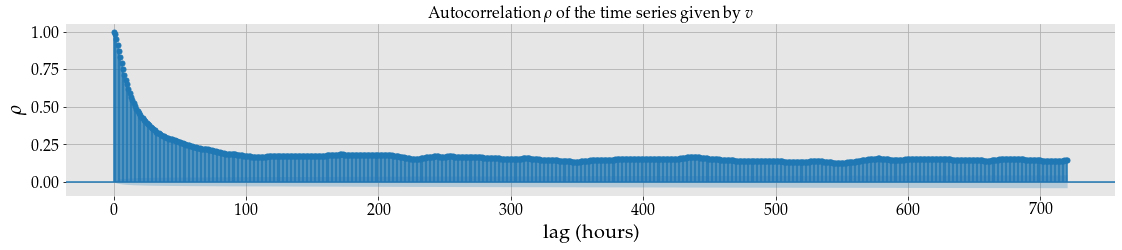

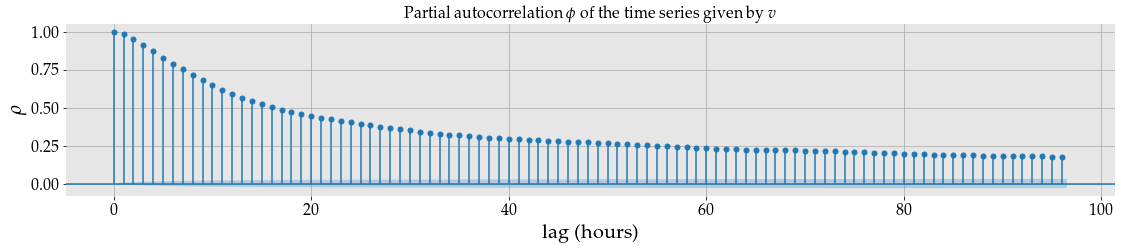

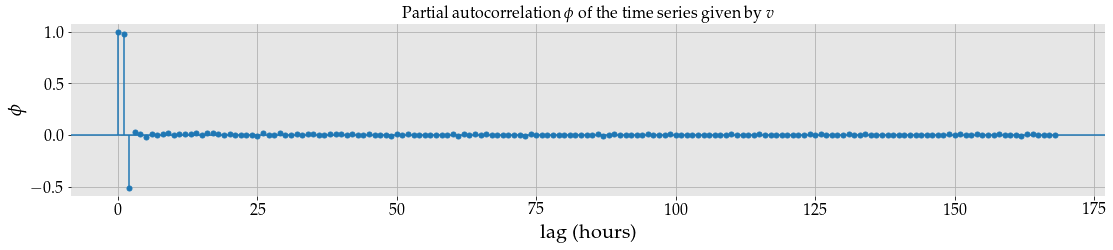

In [7]:
if not dev_mode: wind_speed_plots('bess')

### Wind direction

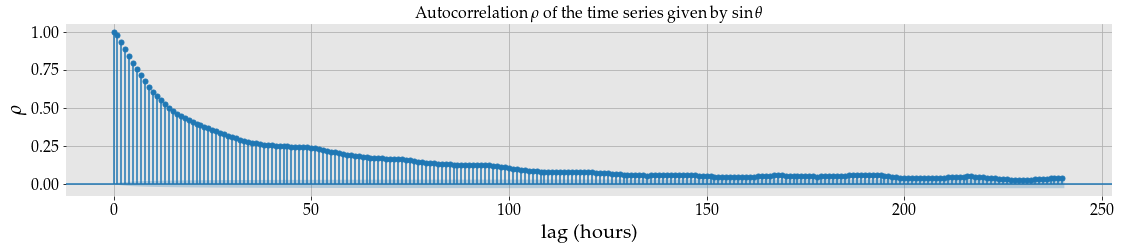

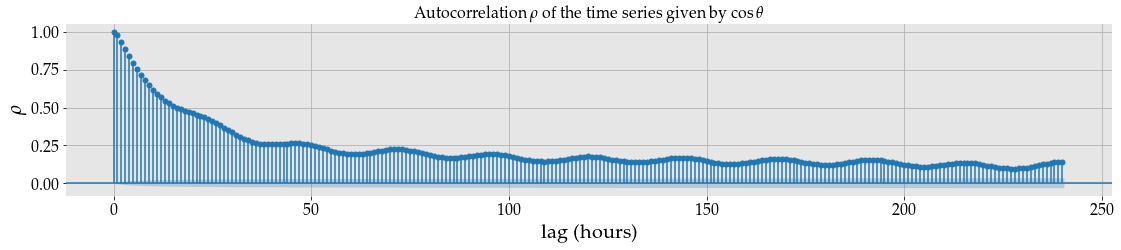

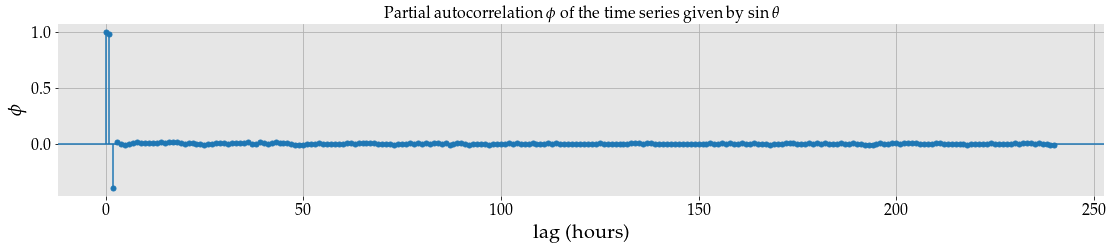

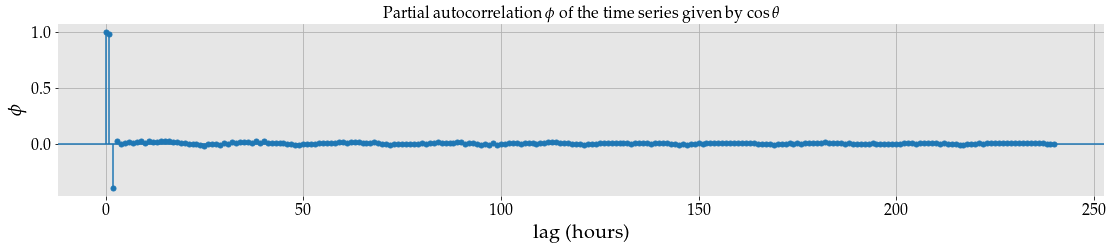

In [46]:
if not dev_mode: wind_direction_plots('bess')

### Production

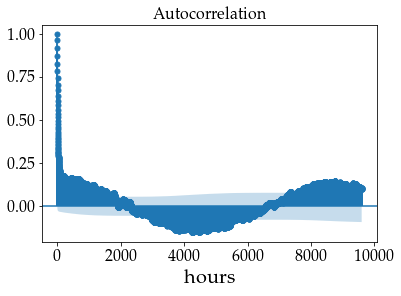

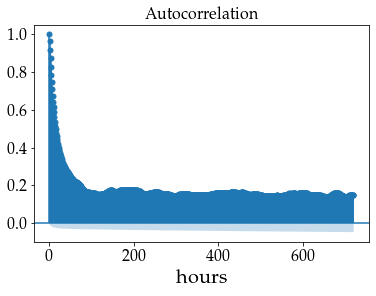

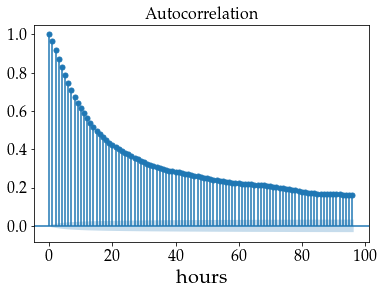

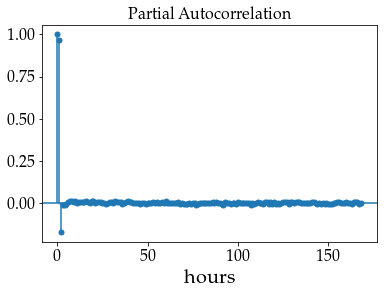

In [8]:
if not dev_mode: production_plots('bess')

### Relation between wind speed and production

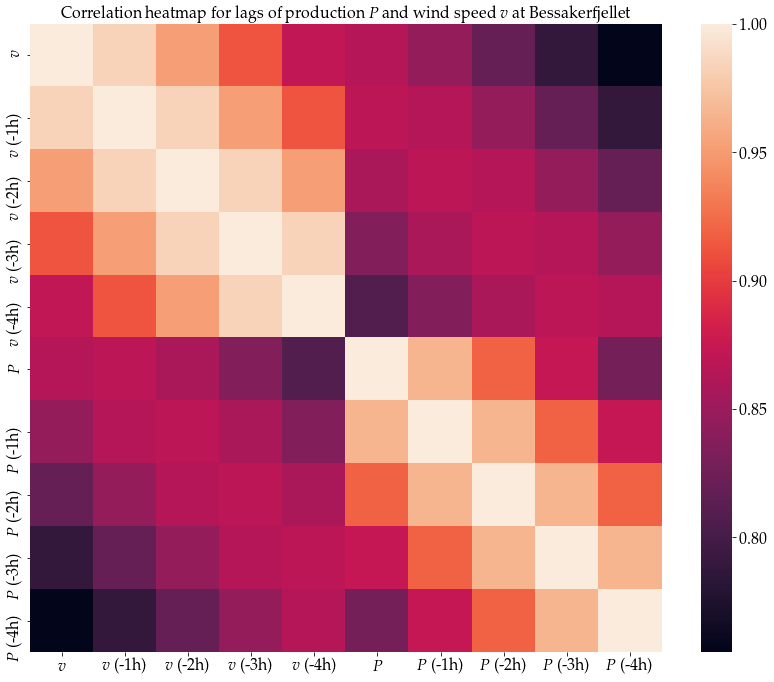

In [21]:
def prod_wind_speed_correlation(park):
    if park=='skom':
        park_name = 'bess'
    else:
        park_name = park
    prod_shift_df = pd.DataFrame()
    prod_shift_df[f'production_{park}'] = data[f'production_{park}']
    names = [r'$P$']
    for i in range(1, 5):
        new = data[f'production_{park}'].shift(-i)
        names.append(r'$P$'+f' (-{i}h)')
        prod_shift_df = pd.concat([prod_shift_df, new], axis=1)
    prod_shift_df.columns = names

    wind_shift_df = pd.DataFrame()
    wind_shift_df[f'wind_speed_{park_name}'] = data[f'wind_speed_{park_name}']
    names = [r'$v$']
    for i in range(1, 5):
        new = data[f'wind_speed_{park_name}'].shift(-i)
        names.append(r'$v$'+f' (-{i}h)')
        wind_shift_df = pd.concat([wind_shift_df, new], axis=1)
    wind_shift_df.columns = names

    combo = pd.concat([wind_shift_df, prod_shift_df], axis=1)
    del wind_shift_df, prod_shift_df

    fig, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(combo.corr(), ax=ax)
    #plt.title(r'Correlation heatmap for lags of production $P$ and wind speed $v$ at Bessakerfjellet')
    plt.tight_layout()
    plt.savefig('corr_heatmap_bess.png')
    plt.show()

if not dev_mode: prod_wind_speed_correlation('bess')

In [16]:
data['wsb_shift-1'] = data['wind_speed_bess'].shift(-1)

In [17]:
data[['wsb_shift1', 'wind_speed_bess', 'wsb_shift-1']]

,wsb_shift1,wind_speed_bess,wsb_shift-1
time,,,
2006-01-01 00:00:00,NaN,10.3,10.2
2006-01-01 01:00:00,10.3,10.2,10.2
2006-01-01 02:00:00,10.2,10.2,9.7
2006-01-01 03:00:00,10.2,9.7,8.9
2006-01-01 04:00:00,9.7,8.9,9.1
...,...,...,...
2020-05-11 19:00:00,6.5,5.2,4.4
2020-05-11 20:00:00,5.2,4.4,3.5
2020-05-11 21:00:00,4.4,3.5,3.5


Production is most correlated with the wind speed in the previous hour. That is a helpful relation for the forecasting model.

## Skomaker

Numerical forecasts at Skomakerfjellet are identical to the ones at Bessakerfjellet, and the plots are therefore not repeated. Production is, however, not identical, and is therefore shown.

### Production

In [ ]:
if not dev_mode: production_plots('skom')

### Relation between wind speed, wind direction, and production

In [ ]:
if not dev_mode: prod_wind_speed_correlation('skom')

## Valsneset

### Wind speed

In [ ]:
if not dev_mode: wind_speed_plots('vals')

### Wind direction

In [ ]:
if not dev_mode: wind_direction_plots('vals')

### Production

In [ ]:
if not dev_mode: production_plots('vals')

### Relation between wind speed, wind direction, and production

In [ ]:
if not dev_mode: prod_wind_speed_correlation('vals')

## Ytre vikna

### Wind speed

In [ ]:
if not dev_mode: wind_speed_plots('yvik')

### Wind direction

In [ ]:
if not dev_mode: wind_direction_plots('yvik')

### Production

In [ ]:
if not dev_mode: production_plots('yvik')

### Relation between wind speed, wind direction, and production

In [ ]:
if not dev_mode: prod_wind_speed_correlation('yvik')